In [1]:
# import preprocessing packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
# read in the data file
df = pd.read_csv('data/admission_master.csv', low_memory=False)
df.head()

,ID,Accept,HSCity,HST,College,DEGREE_TYPE,MAJOR_CODE,Major,Major Description,First_GEN,...,ADMIT_TYPE,ADMT_DESC,COMP,APP_ENTRY_TERM,RESIDENT_CODE,ENROLL,JESUIT,HSNATION,RELIGION,APPLIED
0,214717,NaN,North Eastham,MA,Dolan School of Business,BS,Business Undeclared,Business Undeclared,Business Undeclared,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,214861,NaN,Bridgeport,CT,Dolan School of Business,BS,Marketing,Marketing,Marketing,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,211022,NaN,Newark,NJ,Dolan School of Business,BS,Marketing,Marketing,Marketing,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,211015,NaN,New York,NY,College of Arts and Sciences,BA,Undeclared,Undeclared,Undeclared,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,204374,NaN,Danbury,CT,Dolan School of Business,BS,Management,Management,Management,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# examine columns, determine which ones will need to be imputed/binned/dropped
df.columns

Index(['ID', 'Accept', 'HSCity', 'HST', 'College', 'DEGREE_TYPE', 'MAJOR_CODE',
       'Major', 'Major Description', 'First_GEN', 'RGPA', 'Rating', 'P_M',
       'Merit', 'DEC', 'APP_DESC', 'ACCP', 'CONF', 'Citizen', 'Sex', 'RES',
       'Class Rank', 'Class Size', 'Class Percentile', 'Active City',
       'Active Region', 'Active Postal', 'Active Country', 'Ethnicity',
       'Test Optional', 'Legacy', 'SAT Math OLD', 'SAT WRI OLD',
       'SAT Verbal OLD', 'Total SAT OLD', 'ACT', 'SAT Reading USE',
       'SAT Math USE', 'SAT Total USE', 'Enroll', 'College Code',
       'Sum Ver & Wri', 'SAT Critical Reading - conversion',
       'SAT Math - conversion', 'SAT Reading NEW', 'SAT Math NEW',
       'SAT Total NEW', 'Ethnicity Code', 'ADMIT_TYPE', 'ADMT_DESC', 'COMP',
       'APP_ENTRY_TERM', 'RESIDENT_CODE', 'ENROLL', 'JESUIT', 'HSNATION',
       'RELIGION', 'APPLIED'],
      dtype='object')

In [4]:
# drop unecessary or duplicate columns 
df = df.drop(['ID','Accept','Enroll','ENROLL','SAT Critical Reading - conversion',
             'SAT Math - conversion','SAT Reading NEW', 'SAT Math NEW', 'SAT Total NEW', 'Ethnicity Code',
       'ADMIT_TYPE', 'ADMT_DESC', 'COMP', 'APP_ENTRY_TERM','SAT Math OLD', 'SAT WRI OLD', 'SAT Verbal OLD',
       'Total SAT OLD','HSNATION','Sum Ver & Wri', 'APPLIED','College Code','MAJOR_CODE','Major Description'], axis=1)
# verify that columns were dropped 
df.columns

Index(['HSCity', 'HST', 'College', 'DEGREE_TYPE', 'Major', 'First_GEN', 'RGPA',
       'Rating', 'P_M', 'Merit', 'DEC', 'APP_DESC', 'ACCP', 'CONF', 'Citizen',
       'Sex', 'RES', 'Class Rank', 'Class Size', 'Class Percentile',
       'Active City', 'Active Region', 'Active Postal', 'Active Country',
       'Ethnicity', 'Test Optional', 'Legacy', 'ACT', 'SAT Reading USE',
       'SAT Math USE', 'SAT Total USE', 'RESIDENT_CODE', 'JESUIT', 'RELIGION'],
      dtype='object')

In [5]:
# filter out the targets 
dfy = df.filter(['ACCP','CONF'])
dfy.to_csv('data/targets.csv', index=0)

# drop the targets from the main dataframe
df = df.drop(['ACCP','CONF','APP_DESC','DEC'], axis=1)
df.columns

Index(['HSCity', 'HST', 'College', 'DEGREE_TYPE', 'Major', 'First_GEN', 'RGPA',
       'Rating', 'P_M', 'Merit', 'Citizen', 'Sex', 'RES', 'Class Rank',
       'Class Size', 'Class Percentile', 'Active City', 'Active Region',
       'Active Postal', 'Active Country', 'Ethnicity', 'Test Optional',
       'Legacy', 'ACT', 'SAT Reading USE', 'SAT Math USE', 'SAT Total USE',
       'RESIDENT_CODE', 'JESUIT', 'RELIGION'],
      dtype='object')

In [6]:
# filter out continuous variables 
dfcont = df.filter(['ACT','SAT Math USE','SAT Reading USE',' SAT Total USE', 'RGPA','Class Rank','Class Size','Class Percentile','Rating'])
dfcont.head()

# drop continuous variables from main dataframe
df = df.drop(['Rating','Class Rank', 'Class Size','Class Percentile','ACT', 'SAT Reading USE', 
              'SAT Math USE','SAT Total USE', 'RGPA'], axis=1)

# verify dfcont features 
dfcont.columns

Index(['ACT', 'SAT Math USE', 'SAT Reading USE', 'RGPA', 'Class Rank',
       'Class Size', 'Class Percentile', 'Rating'],
      dtype='object')

In [7]:
# count how many missing values each feature in the main dataframe has 
names = []
val = []

for col in df.columns:
    names.append(col)
    val.append(df[df.columns].isnull().sum())
    break
# print out results as (column_name, # of null values in column_name)
print(names, val)

['HSCity'] [HSCity              162
HST                1452
College               1
DEGREE_TYPE           0
Major                 0
First_GEN          8082
P_M               31403
Merit             27955
Citizen               5
Sex                   0
RES                9978
Active City        9985
Active Region       834
Active Postal     10310
Active Country     9985
Ethnicity           261
Test Optional         0
Legacy            45361
RESIDENT_CODE     44401
JESUIT            53866
RELIGION          45212
dtype: int64]


## Binning

Text(0.5, 1.0, 'College Bins')

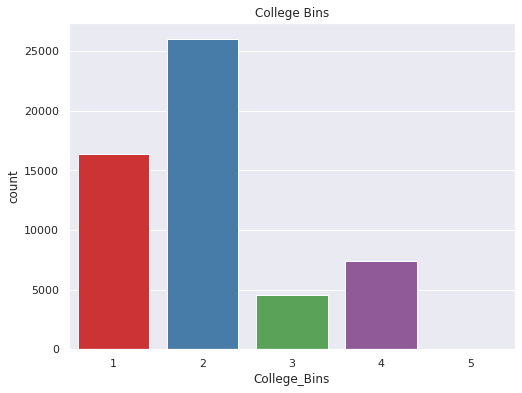

In [8]:
# function for assigning college bins
def assign_college_bins(College):
    if College == 'Dolan School of Business': 
        return(1)
    if College == 'College of Arts & Sciences' or College == 'College of Arts and Sciences':
        return(2)
    if College == 'School of Engineering':
        return(3)    
    if College == 'Egan School of Nursing & Health Sciences' or College == 'Egan School of Nursing and Health Studies':
        return(4)
    else:
        return(5)

# Applying College_Bins function to the DataFrame
df['College_Bins'] = df['College'].apply(assign_college_bins)
df.head()

# verifying College Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="College_Bins", data=df, palette='Set1')
plt.title('College Bins')

Text(0.5, 1.0, 'Legacy Bins')

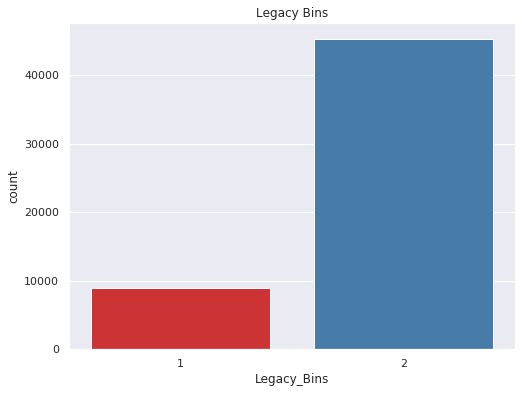

In [9]:
# legacy bins funtion
def assign_legacy_bins(Legacy):
    if Legacy == 'A' or Legacy=='B' or Legacy=='C' or Legacy=='G' or Legacy=='N' or Legacy=='Brother/Sister Current Student' or Legacy=='Brother/Sister of Alumni' or Legacy=='Child/Grandchild of Alumni': 
        return(1)
    else:
        return(2)

# Applying legacy_bins function to the DataFrame
df['Legacy_Bins'] = df['Legacy'].apply(assign_legacy_bins)

# verifying Legacy Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Legacy_Bins", data=df, palette='Set1')
plt.title('Legacy Bins')

Text(0.5, 1.0, 'P_M Bins')

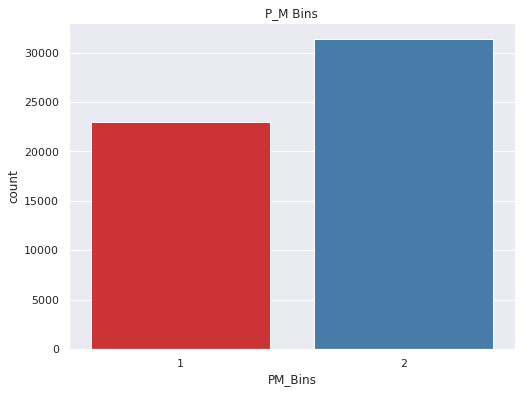

In [10]:
# P_M bins
def assign_pm_bins(P_M):
    if P_M == 'MIN' or P_M=='PLUS': 
        return(1)
    else:
        return(2)
    
# Applying pm_bins function to the DataFrame
df['PM_Bins'] = df['P_M'].apply(assign_pm_bins)

# verifying P_M Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="PM_Bins", data=df, palette='Set1')
plt.title('P_M Bins')

Text(0.5, 1.0, 'Merit Bins')

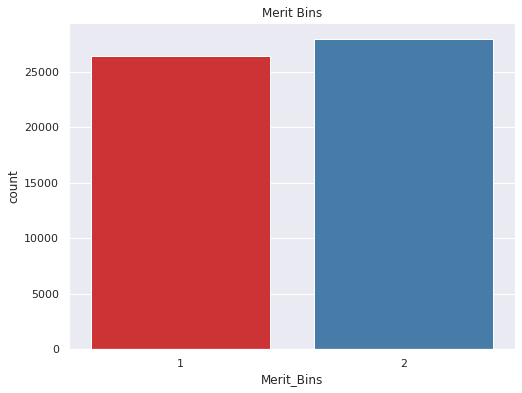

In [11]:
# Merit bins
def assign_merit_bins(Merit):
    if Merit == 'BELL' or Merit=='COMP' or Merit=='COMS' or Merit=='LOY' or Merit=='MAGI' or Merit=='XAV': 
        return(1)
    else:
        return(2)
    
# Applying merit bins function to the DataFrame
df['Merit_Bins'] = df['Merit'].apply(assign_merit_bins)

# verifying Merit Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Merit_Bins", data=df, palette='Set1')
plt.title('Merit Bins')

Text(0.5, 1.0, 'Jesuit Bins')

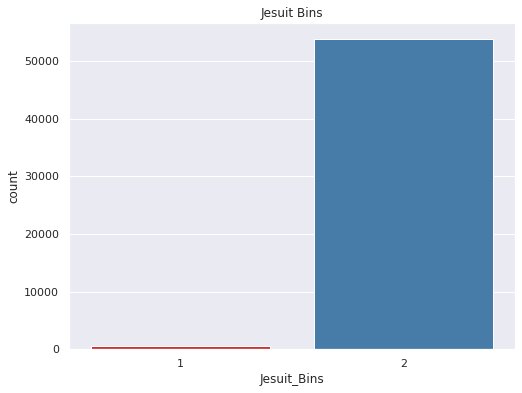

In [12]:
# Jesuit bins
def assign_jesuit_bins(JESUIT):
    if JESUIT=='J': 
        return(1)
    else:
        return(2)
    
# Applying jesuit bins function to the DataFrame
df['Jesuit_Bins'] = df['JESUIT'].apply(assign_jesuit_bins)

# verifying Jesuit Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Jesuit_Bins", data=df, palette='Set1')
plt.title('Jesuit Bins')

Text(0.5, 1.0, 'Religion Bins')

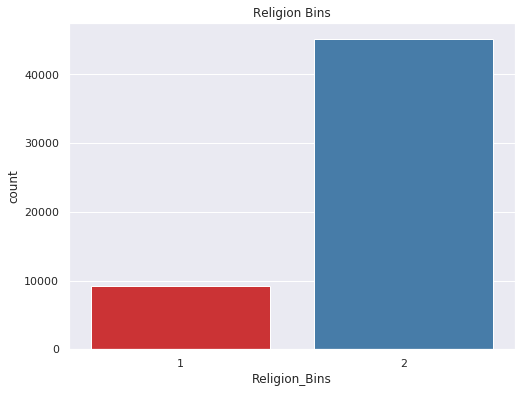

In [13]:
# Religion bins
def assign_religion_bins(RELIGION):
    if RELIGION=='BA' or RELIGION=='BA' or RELIGION=='BU' or RELIGION=='CA' or RELIGION=='CC' or RELIGION=='CH' or RELIGION=='CO' or RELIGION=='CS' or RELIGION=='EP' or RELIGION=='FR' or RELIGION=='HU' or RELIGION=='JE' or RELIGION=='JW' or RELIGION=='LU' or RELIGION=='ME' or RELIGION=='MN' or RELIGION=='MO' or RELIGION=='MU' or RELIGION=='NL' or RELIGION=='NO' or RELIGION=='OC' or RELIGION=='PB' or RELIGION=='PH' or RELIGION=='RE' or RELIGION=='SD' or RELIGION=='SI' or RELIGION=='UN' or RELIGION=='UT': 
        return(1)
    else:
        return(2)
    
# Applying religion function to the DataFrame
df['Religion_Bins'] = df['RELIGION'].apply(assign_religion_bins)

# verifying religion Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Religion_Bins", data=df, palette='Set1')
plt.title('Religion Bins')

Text(0.5, 1.0, 'Ethnicity Bins')

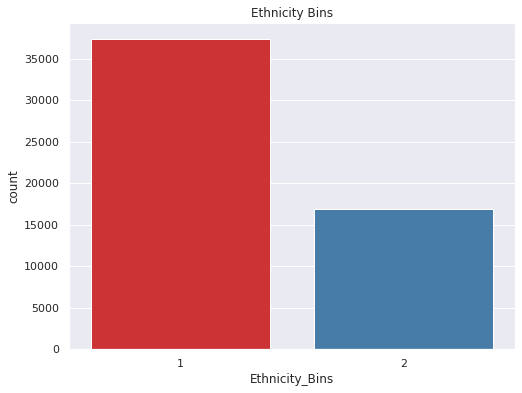

In [14]:
# ethnicity bins
def assign_ethnicity_bins(Ethnicity):
    if Ethnicity=='White' or Ethnicity=='White,Including Spain/Portugal':
        return(1)
    else:
        return(2)

# Applying ethnicity bins function to the DataFrame
df['Ethnicity_Bins'] = df['Ethnicity'].apply(assign_ethnicity_bins)

# verifying Ethnicity Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Ethnicity_Bins", data=df, palette='Set1')
plt.title('Ethnicity Bins')

Text(0.5, 1.0, 'First Generation Bins')

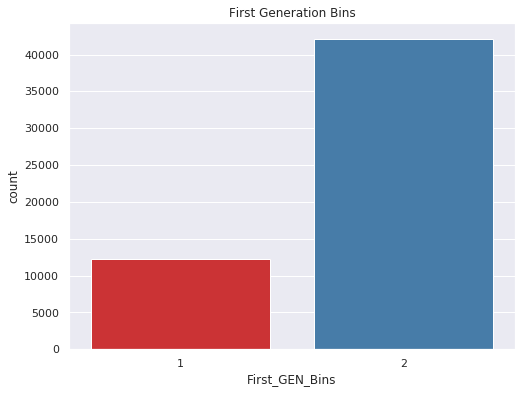

In [15]:
# First Generation bins
def assign_generation_bins(First_GEN):
    if First_GEN=='Y' or First_GEN=='34':
        return(1)
    else:
        return(2)

# Applying first generation bins function to the DataFrame
df['First_GEN_Bins'] = df['First_GEN'].apply(assign_generation_bins)

# verifying First Generation Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="First_GEN_Bins", data=df, palette='Set1')
plt.title('First Generation Bins')

Text(0.5, 1.0, 'Citizen Bins')

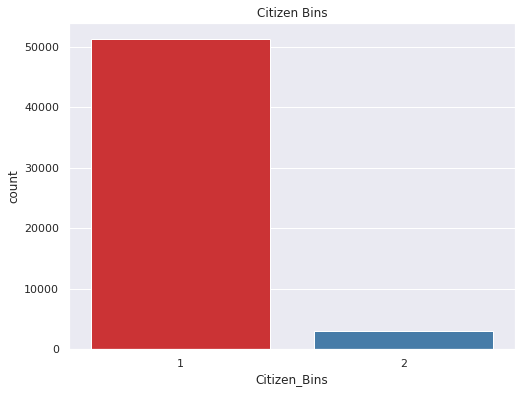

In [16]:
# Citizen Bins
def assign_citizen_bins(Citizen):
    if Citizen=='Citizen' or Citizen=='US':
        return(1)
    else:
        return(2)

# Applying citizen bins function to the DataFrame
df['Citizen_Bins'] = df['Citizen'].apply(assign_citizen_bins)

# verifying Citizen Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Citizen_Bins", data=df, palette='Set1')
plt.title('Citizen Bins')

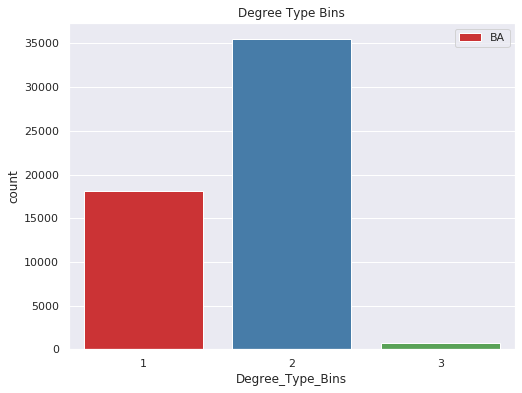

In [17]:
# Degree Type Bins
def assign_degree_type_bins(DEGREE_TYPE):
    if DEGREE_TYPE == 'BA':
        return(1)
    if DEGREE_TYPE == 'BS' or DEGREE_TYPE == 'BSE':
        return(2)
    else:
        return(3)

# Applying citizen bins function to the DataFrame
df['Degree_Type_Bins'] = df['DEGREE_TYPE'].apply(assign_degree_type_bins)

# verifying Degree Type Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Degree_Type_Bins", data=df, palette='Set1')
plt.title('Degree Type Bins')
plt.legend(['BA','BS','Unknown'])

# Resident Bins
def assign_resident_bins(RES, RESIDENT_CODE):
    if RES == 'R' or RESIDENT_CODE == '':
        return(1)
    else:
        return(2)

# Applying citizen bins function to the DataFrame
df['Resident_Bins'] = df[''].apply(assign_degree_type_bins)

# verifying Degree Type Bins
fig = plt.figure(figsize=(8,6))
ax = sns.countplot(x="Degree_Type_Bins", data=df, palette='Set1')
plt.title('Degree Type Bins')
plt.legend(['BA','BS','Unknown'])

In [18]:
# drop original features that were binned
df = df.drop(['College','First_GEN','P_M', 'Merit', 'Citizen', 'Sex','Ethnicity',
       'Test Optional', 'Legacy','JESUIT', 'RELIGION','DEGREE_TYPE'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54378 entries, 0 to 54377
Data columns (total 19 columns):
HSCity              54216 non-null object
HST                 52926 non-null object
Major               54378 non-null object
RES                 44400 non-null object
Active City         44393 non-null object
Active Region       53544 non-null object
Active Postal       44068 non-null object
Active Country      44393 non-null object
RESIDENT_CODE       9977 non-null object
College_Bins        54378 non-null int64
Legacy_Bins         54378 non-null int64
PM_Bins             54378 non-null int64
Merit_Bins          54378 non-null int64
Jesuit_Bins         54378 non-null int64
Religion_Bins       54378 non-null int64
Ethnicity_Bins      54378 non-null int64
First_GEN_Bins      54378 non-null int64
Citizen_Bins        54378 non-null int64
Degree_Type_Bins    54378 non-null int64
dtypes: int64(10), object(9)
memory usage: 7.9+ MB


## Imputation of Continuous Variables

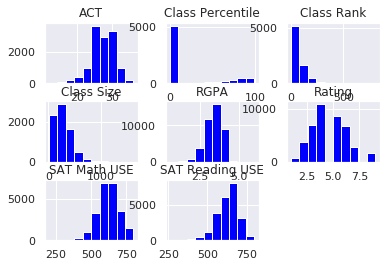

In [19]:
# exmaine the features in the dfcont dataframe 
for col in dfcont.columns:
    dfcont.hist(color='blue')
    break
plt.show()

In [20]:
# replace null value with mean because we have continuous variables and the features are too skewed to use the mode 
for value in dfcont.columns:
    dfcont.fillna(dfcont.median(), inplace=True)
print(dfcont.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0]


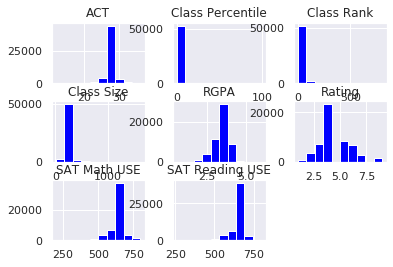

In [21]:
# relooking at continuous variables
for col in dfcont.columns:
    dfcont.hist(color='blue')
    break
plt.show()

## Handling Location Features 

In [29]:
# drop rows where HSCity & Active Region have missing values
# these are low impact features because not many were missing so it is ok to remove the rows 
df = df.dropna(axis=0, how='any', subset=['HSCity','HST','Active Region'])
df.head()

,HSCity,HST,Major,RES,Active City,Active Region,Active Postal,Active Country,RESIDENT_CODE,College_Bins,Legacy_Bins,PM_Bins,Merit_Bins,Jesuit_Bins,Religion_Bins,Ethnicity_Bins,First_GEN_Bins,Citizen_Bins,Degree_Type_Bins
0,North Eastham,MA,Business Undeclared,R,South Yarmouth,MA,02664-5229,United States,NaN,1,2,2,2,2,2,2,1,1,2
1,Bridgeport,CT,Marketing,C,Bridgeport,CT,06606-4225,United States,NaN,1,2,2,2,2,2,2,1,1,2
2,Newark,NJ,Marketing,R,Newark,NJ,07108-1513,United States,NaN,1,2,2,2,2,2,2,2,1,2
3,New York,NY,Undeclared,R,Middle Vlg,NY,11379-1960,United States,NaN,2,2,2,2,2,2,1,2,1,1
4,Danbury,CT,Management,C,Danbury,CT,06810-6735,United States,NaN,1,2,2,2,2,2,2,1,1,2


In [30]:
df.shape

(52786, 19)

In [31]:
# count how many missing values each feature in the main dataframe has 
names = []
val = []

for col in df.columns:
    names.append(col)
    val.append(df[df.columns].isnull().sum())
    break
# print out results as (column_name, # of null values in column_name)
print(names, val)

['HSCity'] [HSCity                  0
HST                     0
Major                   0
RES                  9671
Active City          9670
Active Region           0
Active Postal        9681
Active Country       9670
RESIDENT_CODE       43116
College_Bins            0
Legacy_Bins             0
PM_Bins                 0
Merit_Bins              0
Jesuit_Bins             0
Religion_Bins           0
Ethnicity_Bins          0
First_GEN_Bins          0
Citizen_Bins            0
Degree_Type_Bins        0
dtype: int64]


In [33]:
df = df.drop(['Active City','Active Postal','Active Country'], axis=1)

In [34]:
# count how many missing values each feature in the main dataframe has 
names = []
val = []

for col in df.columns:
    names.append(col)
    val.append(df[df.columns].isnull().sum())
    break
# print out results as (column_name, # of null values in column_name)
print(names, val)

['HSCity'] [HSCity                  0
HST                     0
Major                   0
RES                  9671
Active Region           0
RESIDENT_CODE       43116
College_Bins            0
Legacy_Bins             0
PM_Bins                 0
Merit_Bins              0
Jesuit_Bins             0
Religion_Bins           0
Ethnicity_Bins          0
First_GEN_Bins          0
Citizen_Bins            0
Degree_Type_Bins        0
dtype: int64]
